In [39]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



In [27]:
df = pd.read_csv('./datasets/london.csv')

In [50]:
df.describe()



,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [51]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [14]:
weather_code_counts = df.groupby('weather_code').size()
print(weather_code_counts)

weather_code
1.0     6150
2.0     4034
3.0     3551
4.0     1464
7.0     2141
10.0      14
26.0      60
dtype: int64


<ul>
    <li>1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity</li>
    <li>2 = scattered clouds / few clouds</li>
    <li> 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain</li>
    10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog</li>
</ul>

In [15]:
season_counts = df.groupby('season').size()
print(season_counts)

season
0.0    4394
1.0    4387
2.0    4303
3.0    4330
dtype: int64


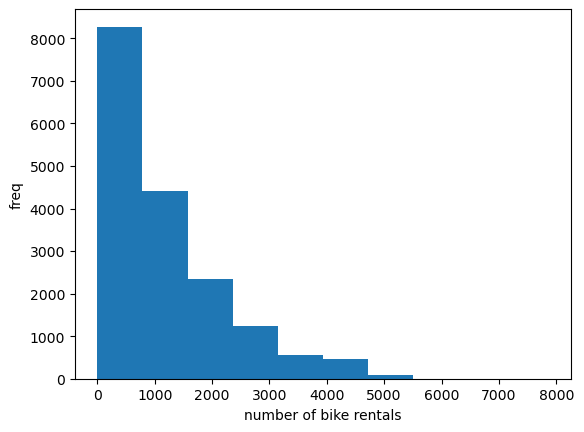

In [28]:
plt.hist(df["cnt"])
plt.xlabel("number of bike rentals")
plt.ylabel("freq")
plt.show()



In [52]:
X = df.drop('cnt', axis=1)  # Drop 'cnt' to use other variables as predictors
y = df['cnt']  # Target variable



In [72]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [74]:
regressor = DecisionTreeRegressor(criterion="squared_error", max_depth=10, min_samples_split=10, random_state=5)

In [75]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [76]:
y_pred = regressor.predict(X_test)

In [77]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 861317.8645235755


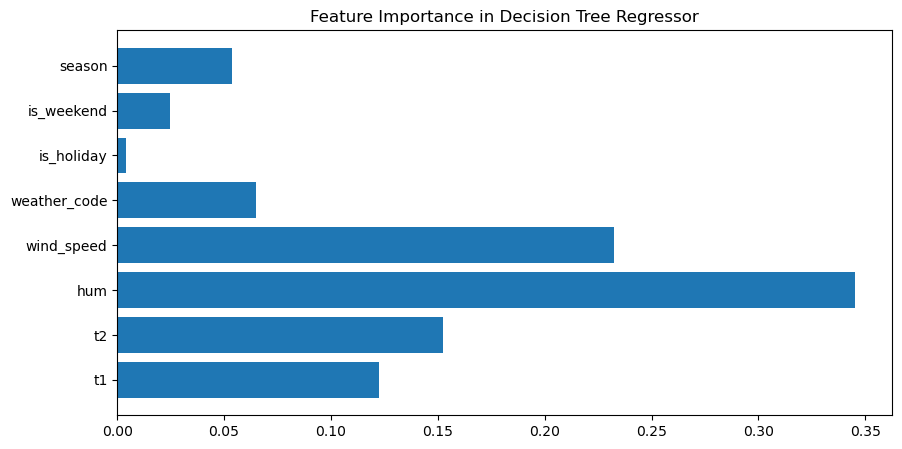

In [60]:
importances = regressor.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.title('Feature Importance in Decision Tree Regressor')
plt.show()